## Python - 22146

# Group 1: Analysis on Subway Felonies and crimes occurred from 2019 to 2024 Feb

## By:
### Shubham Mittal
### Akshat Shanbhag
### Swayambhu Dhuri


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 8)
from prettytable import PrettyTable
table = PrettyTable()

# Load the dataset
data = pd.read_csv("MTA_Major_Felonies.csv")

## Mathematical Representation to Calculate,
### ```      Crimes per Million Riders = (felony_count/ridership) * 1000000 ```


In [3]:
# printing the top 5 rows of the dataset
data.head()

Month Agency Police Force     Felony Type  Felony Count  \
0  01/01/2019    MNR        MTAPD        Burglary             1   
1  01/01/2019    MNR        MTAPD  Felony Assault             3   
2  01/01/2019    MNR        MTAPD          Murder             0   
3  01/01/2019    MNR        MTAPD            Rape             0   
4  01/01/2019    MNR        MTAPD         Robbery             1   

   Crimes per Million Riders  
0                       0.15  
1                       0.44  
2                       0.00  
3                       0.00  
4                       0.15

In [4]:
data.shape

(1506, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      1506 non-null   object 
 1   Agency                     1506 non-null   object 
 2   Police Force               1506 non-null   object 
 3   Felony Type                1506 non-null   object 
 4   Felony Count               1506 non-null   int64  
 5   Crimes per Million Riders  1499 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 70.7+ KB


In [6]:
# Convert 'Month' column to datetime format
data['Month'] = pd.to_datetime(data['Month'], format='%m/%d/%Y')

In [7]:
data.isna().sum()

Month                        0
Agency                       0
Police Force                 0
Felony Type                  0
Felony Count                 0
Crimes per Million Riders    7
dtype: int64

In [8]:
data.fillna(0, inplace=True)

In [9]:
data.isna().sum()

Month                        0
Agency                       0
Police Force                 0
Felony Type                  0
Felony Count                 0
Crimes per Million Riders    0
dtype: int64

In [13]:
unique_data = ['Agency', 'Felony Type', 'Police Force']

table.field_names = ["Column Name", "Unique Values"]

for unique in unique_data:
    table.add_row([unique, data[unique].unique()])

print(table)

+--------------+------------------------------------------------------------------------+
| Column Name  |                             Unique Values                              |
+--------------+------------------------------------------------------------------------+
|    Agency    |                      ['MNR' 'LIRR' 'NYCT' 'SIR']                       |
| Felony Type  | ['Burglary' 'Felony Assault' 'Murder' 'Rape' 'Robbery' 'Grand Larceny' |
|              |                          'Grand Larceny Auto']                         |
| Police Force |                            ['MTAPD' 'NYPD']                            |
|    Agency    |                      ['MNR' 'LIRR' 'NYCT' 'SIR']                       |
| Felony Type  | ['Burglary' 'Felony Assault' 'Murder' 'Rape' 'Robbery' 'Grand Larceny' |
|              |                          'Grand Larceny Auto']                         |
| Police Force |                            ['MTAPD' 'NYPD']                            |
+---------

In [14]:
grouped_data = data.groupby(['Month', 'Agency']).sum().reset_index()

<ipython-input-14-1344747dee21>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby(['Month', 'Agency']).sum().reset_index()


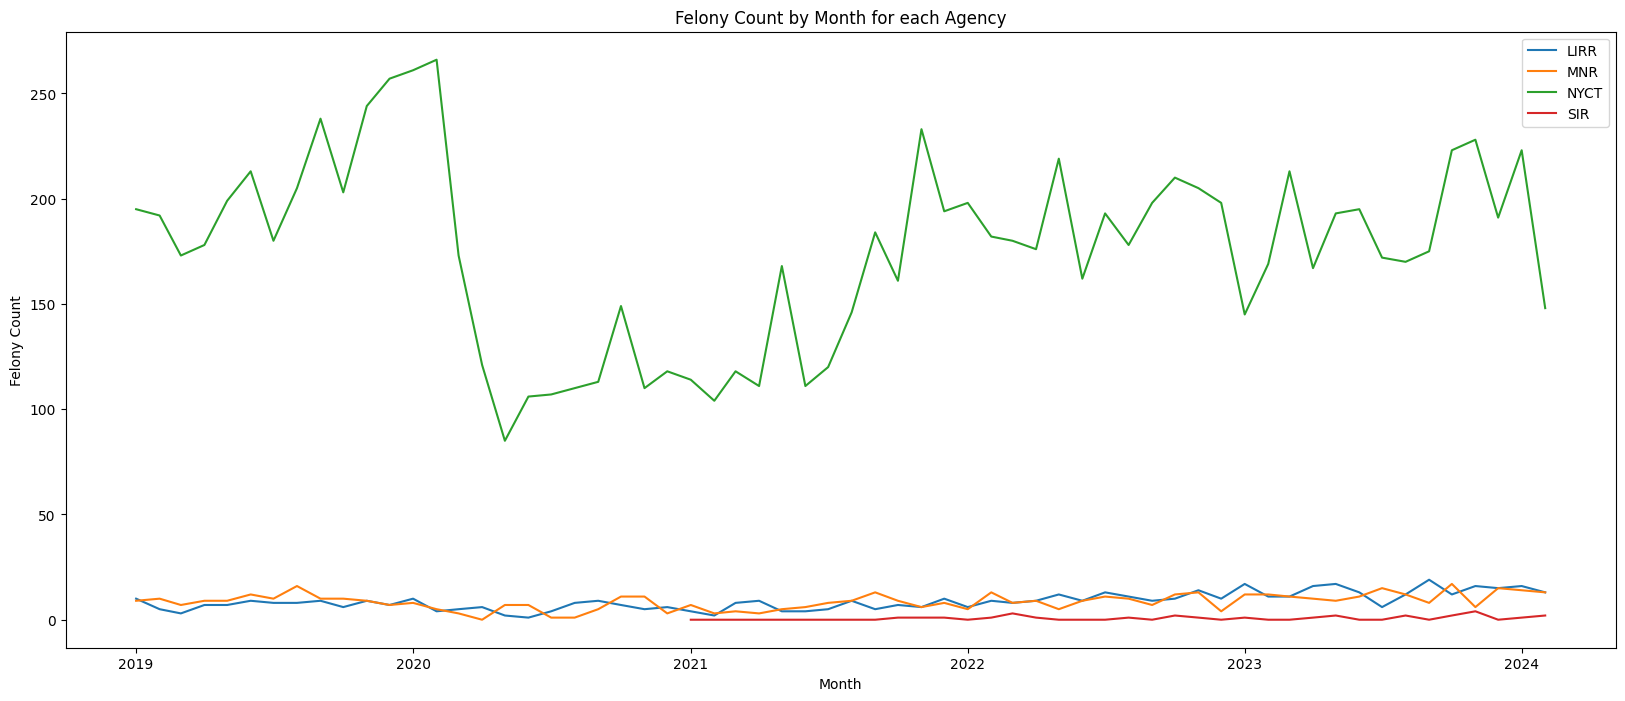

In [ ]:
for agency, df in grouped_data.groupby('Agency'):
  plt.plot(df['Month'], df['Felony Count'], label=agency)
plt.title('Felony Count by Month for each Agency')
plt.xlabel('Month')
plt.ylabel('Felony Count')
plt.legend()
plt.show()

The above graph shows the representation of Felony Count by Month for each Agency. Through this we can observe that the maximum amount of felonies happened in Agency named NYCT.

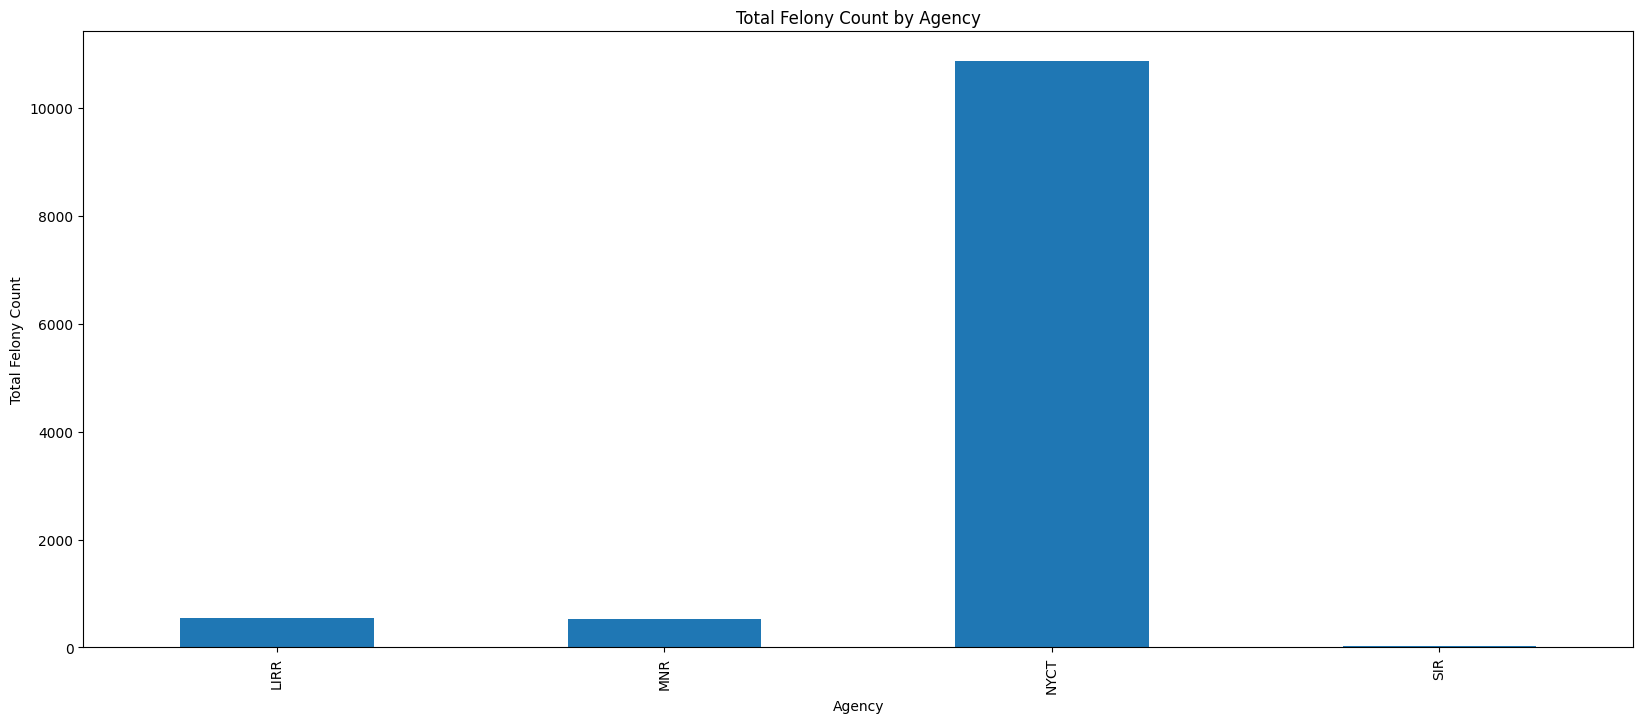

In [15]:
total_felony_by_agency = grouped_data.groupby('Agency')['Felony Count'].sum()
total_felony_by_agency.plot(kind='bar')
plt.title('Total Felony Count by Agency')
plt.xlabel('Agency')
plt.ylabel('Total Felony Count')
plt.show()

The above bar graph is representation of the total felony count by agency through 2019 till 2024 February.

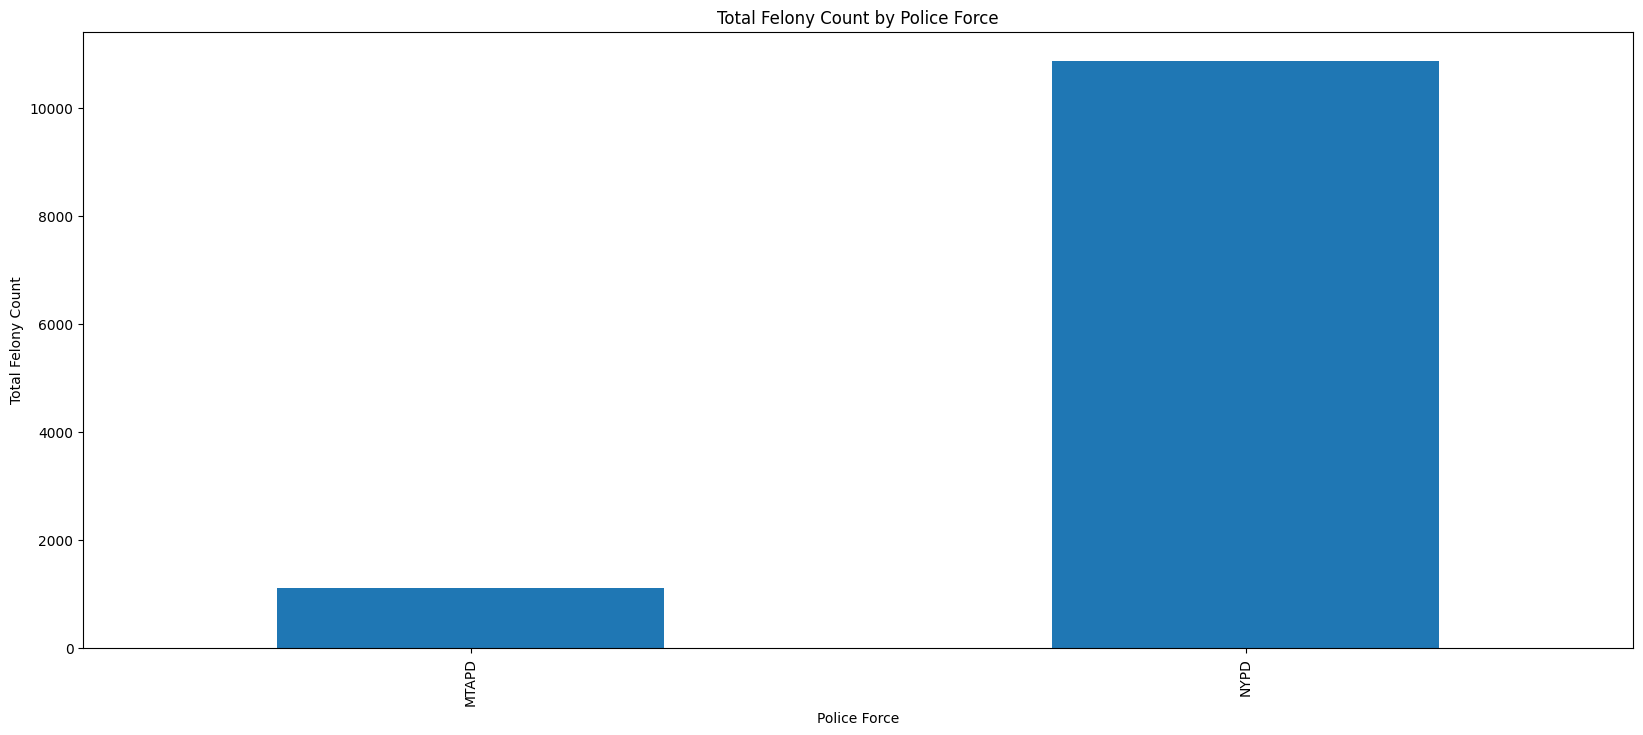

In [16]:
total_felony_by_police_force = data.groupby('Police Force')['Felony Count'].sum()
total_felony_by_police_force.plot(kind='bar')
plt.title('Total Felony Count by Police Force')
plt.xlabel('Police Force')
plt.ylabel('Total Felony Count')
plt.show()

The above graph shows the representation of the Total Felony count by Police Force. Telling that how many felonies have been handled by represpective police force. And it can be observed that maximum amount of felonies have been taken care by NYPD.

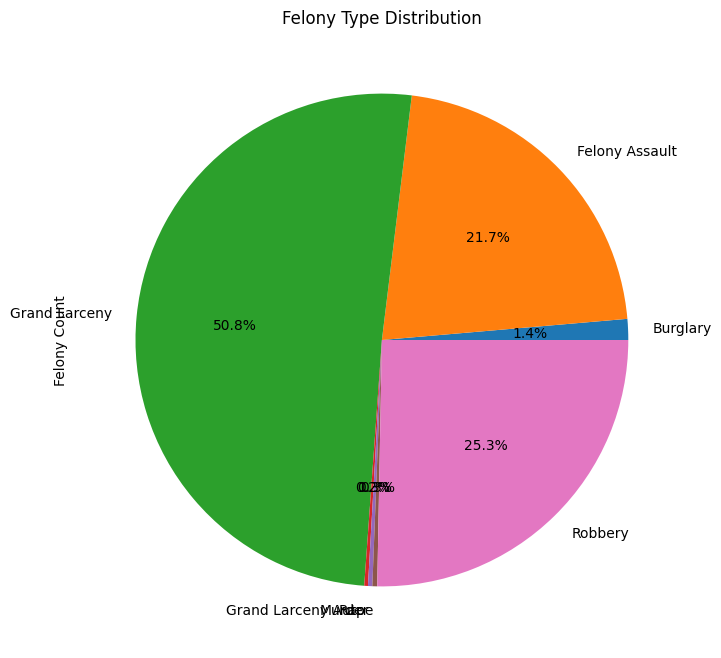

In [17]:
felony_type_distribution = data.groupby('Felony Type')['Felony Count'].sum()
felony_type_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Felony Type Distribution')
plt.show()

The above Pie chart shows the Felony Type Distribution. Through this chart we can observe that major three felonies that are Grand Larceny, Burglary, and Robbery contributes to about 97.8% of the felonies. Whereas, remaining are just 2.2%.



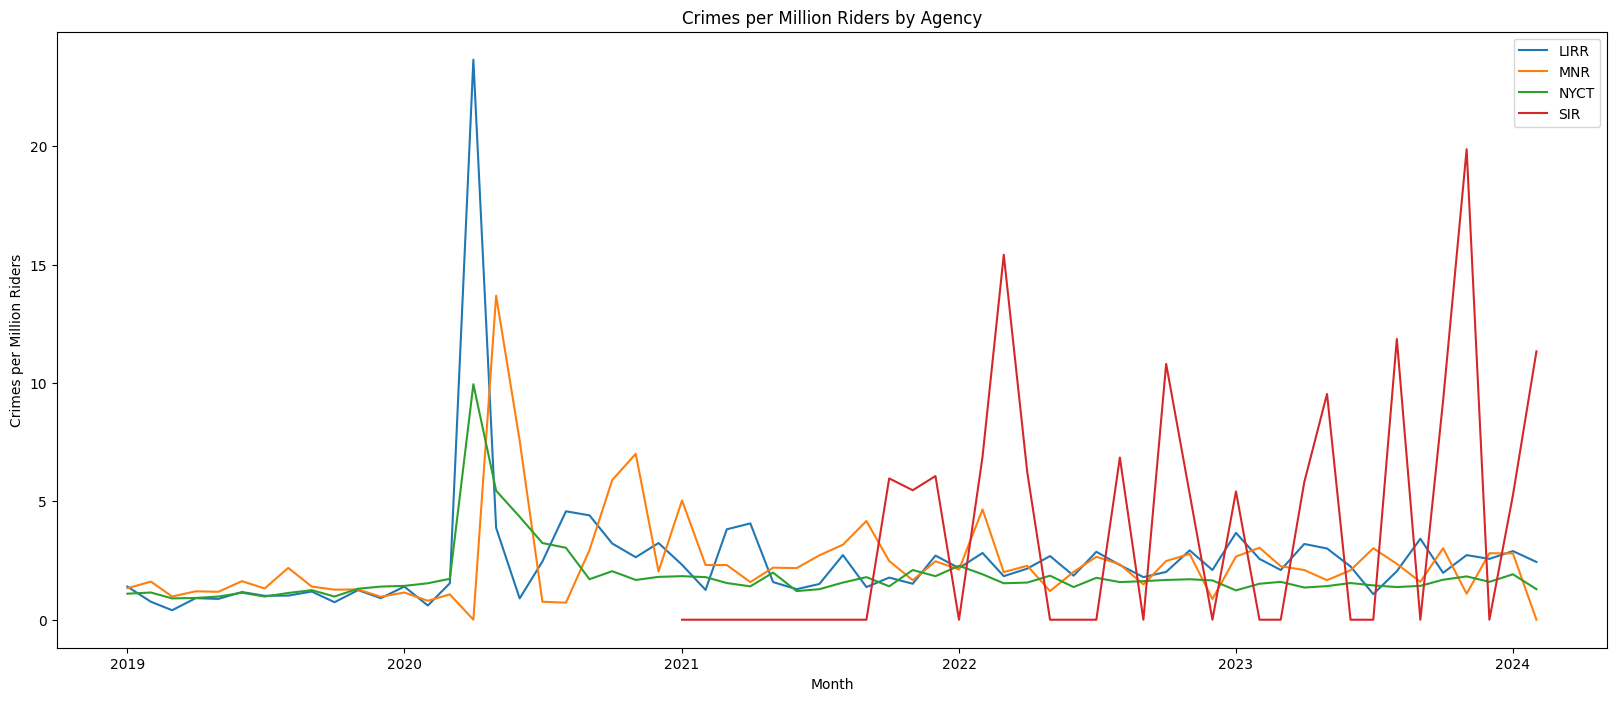

In [ ]:
for agency, df in grouped_data.groupby('Agency'):
    plt.plot(df['Month'], df['Crimes per Million Riders'], label=agency)
plt.title('Crimes per Million Riders by Agency')
plt.xlabel('Month')
plt.ylabel('Crimes per Million Riders')
plt.legend()
plt.show()

This graph shows the Crimes per million riders by Agency. We can observe through this graph that LIRR has the maximum amount feonies with respect to total number of riders. Whereas, NYCT having the highest number of felonies has comparitevly less number of felonies with respect to total number of riders. Also, we can see that their is high peak just after 2020, showing that felony count was high with respect to riders as due to Covid 19 there were less riders.

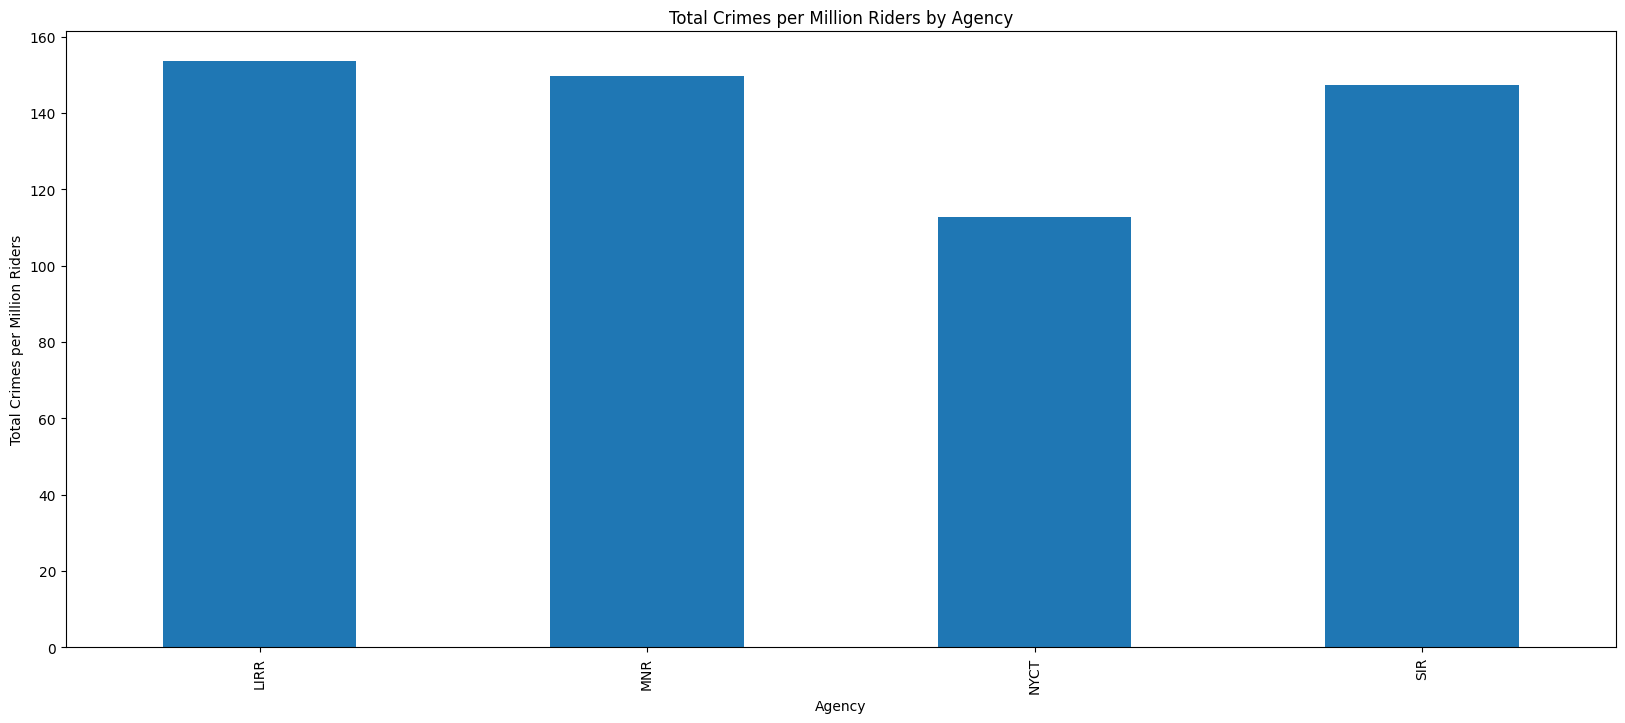

In [ ]:
total_crimes_per_million_by_agency = grouped_data.groupby('Agency')['Crimes per Million Riders'].sum()
total_crimes_per_million_by_agency.plot(kind='bar')
plt.title('Total Crimes per Million Riders by Agency')
plt.xlabel('Agency')
plt.ylabel('Total Crimes per Million Riders')
plt.show()

The above graph shows the Total Crimes per million riders by Agency. Showing that the NYCT has less number of crimes with respect to the total number of riders. Whereas LIRR followed by MNR and SIR has the highest numbers with respect to the total number of riders.

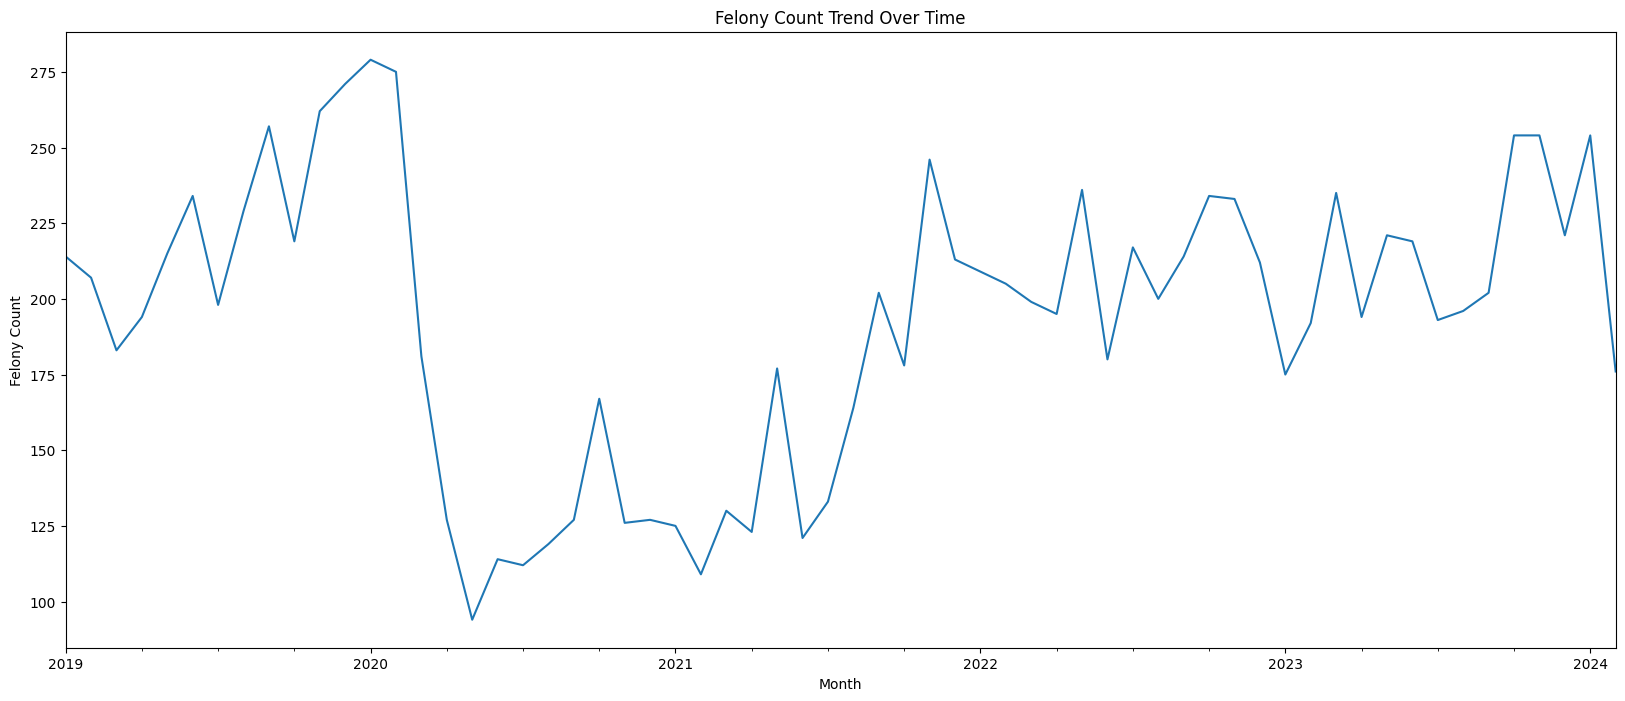

In [ ]:
felony_count_trend = data.groupby('Month')['Felony Count'].sum()
felony_count_trend.plot()
plt.title('Felony Count Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Felony Count')
plt.show()

The above graph shows that Felony Count Trend over Time. Through this we can observe that there were less number of felonies happened during 2020 till 2021 due to COVID 19 lockdown. Also, being the SIR data not available before 2021 mid still the number of felonies were very high post 2020 compared to past 2021.

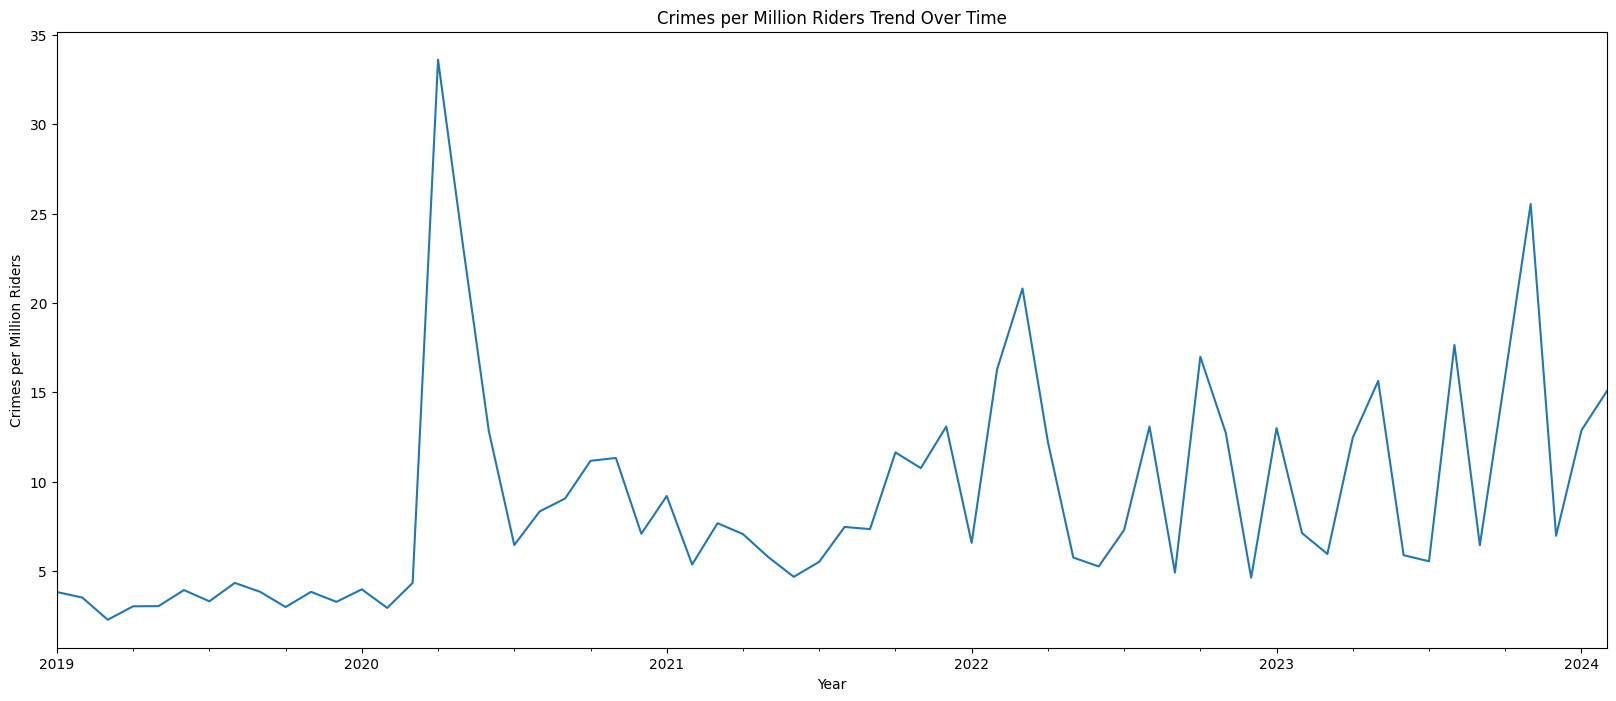

In [ ]:
crimes_per_million_trend = data.groupby('Month')['Crimes per Million Riders'].sum()
crimes_per_million_trend.plot()
plt.title('Crimes per Million Riders Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Crimes per Million Riders')
plt.show()

The above graph shows the Crimes per million riders trend over time. This graph shows the trend of number of fellonies happening with respect to total number of riders using services of the MTA agencies.

In [18]:
police_felony = data.copy()

In [19]:
# Adding the column Year with extracting year from the Month column
police_felony['Year'] = police_felony['Month'].dt.year

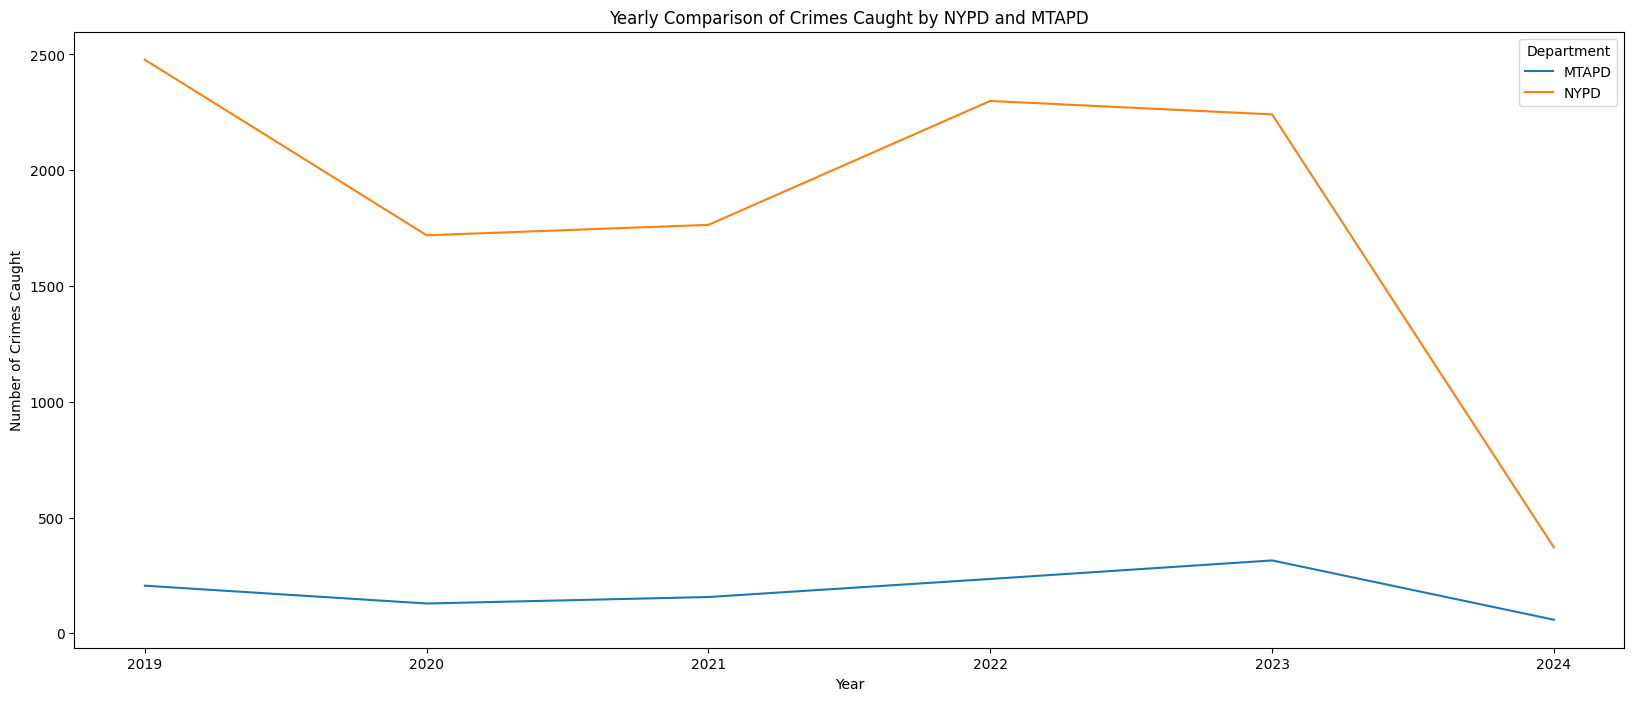

In [20]:
department_yearly_crimes = police_felony.groupby(['Police Force', 'Year'])['Felony Count'].sum().unstack('Police Force')

department_yearly_crimes.plot(kind='line')

plt.title('Yearly Comparison of Crimes Caught by NYPD and MTAPD')
plt.xlabel('Year')
plt.ylabel('Number of Crimes Caught')
plt.legend(title='Department')
plt.show()

The above graph is representation of the Yearly Comparison of Crimes caught by NYPD and MTAPD. Through this graph we can see that NYPD has the maximum number of cases registered as compared to the MTAPD. Also, pre-covid results shows high number of felonies compared to the post-covid results that before 2020 and after 2021 respectively.

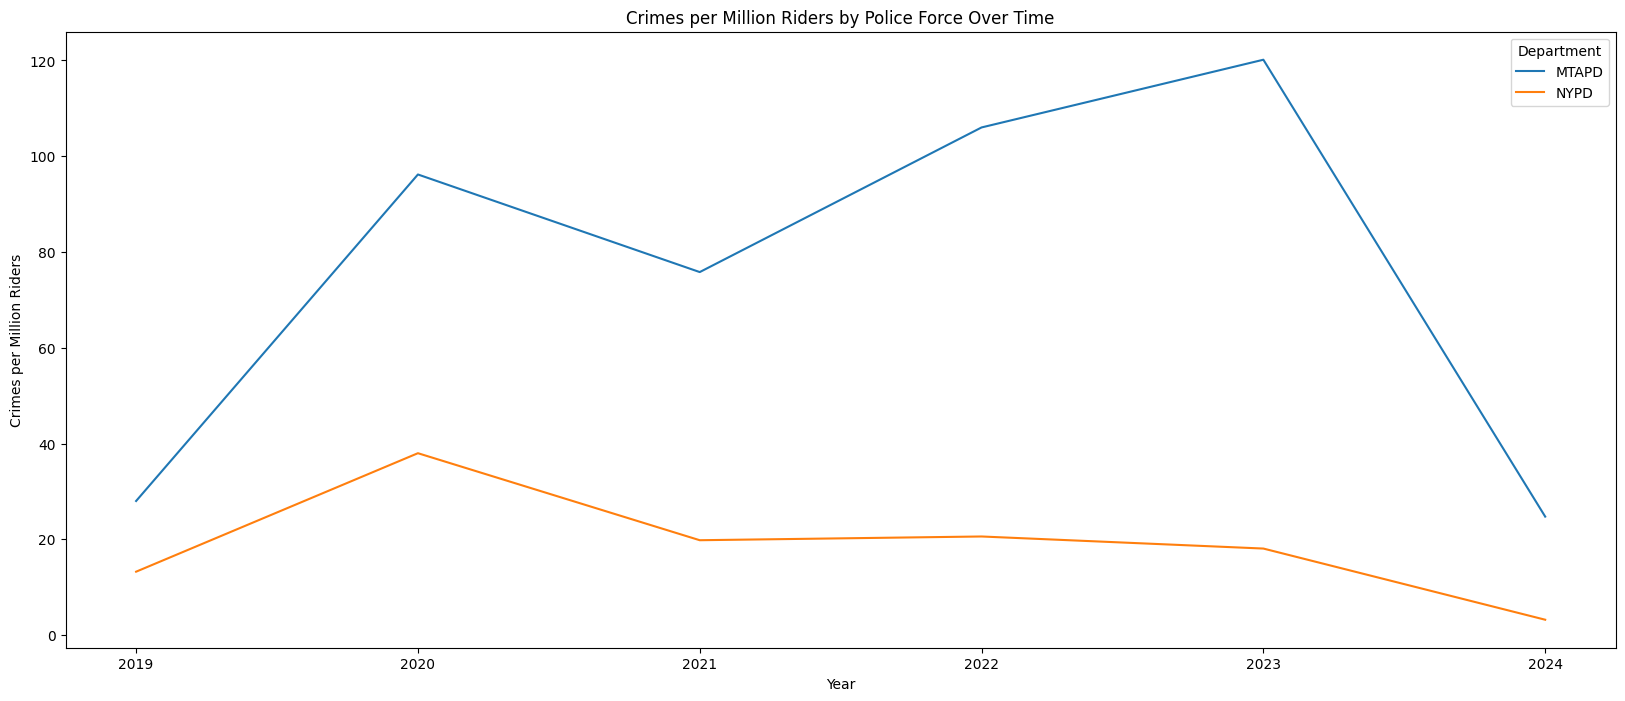

In [21]:
department_yearly_crimes = police_felony.groupby(['Police Force', 'Year'])['Crimes per Million Riders'].sum().unstack('Police Force')

department_yearly_crimes.plot(kind='line')

plt.title('Crimes per Million Riders by Police Force Over Time')
plt.xlabel('Year')
plt.ylabel('Crimes per Million Riders')
plt.legend(title='Department')
plt.show()

The above line graph shows the representation of the Crimes per million riders by police force over time. Showing the insights above felonies that were handled by the police force with respect to the total number of riders using MTA subway services.

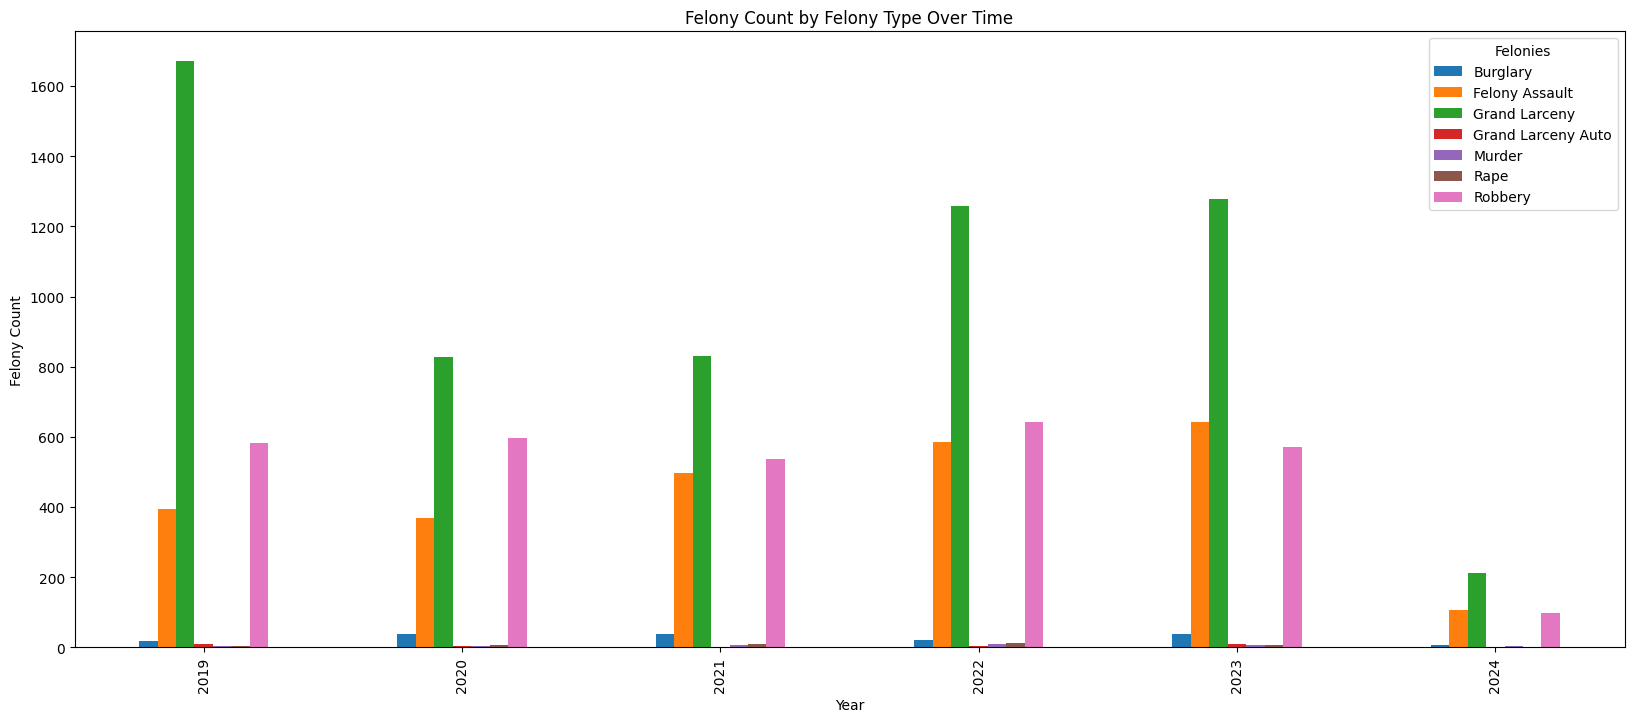

In [ ]:
department_yearly_crimes = police_felony.groupby(['Felony Type', 'Year'])['Felony Count'].sum().unstack('Felony Type')
department_yearly_crimes.plot(kind='bar')

plt.title('Felony Count by Felony Type Over Time')
plt.xlabel('Year')
plt.ylabel('Felony Count')
plt.legend(title='Felonies')
plt.show()

The above bar graph shows the Felony Count by Felony Type Over Time. Through this we can see that Grand Larceny being the highest number of felony type before covid. And slowly rising again after covid.

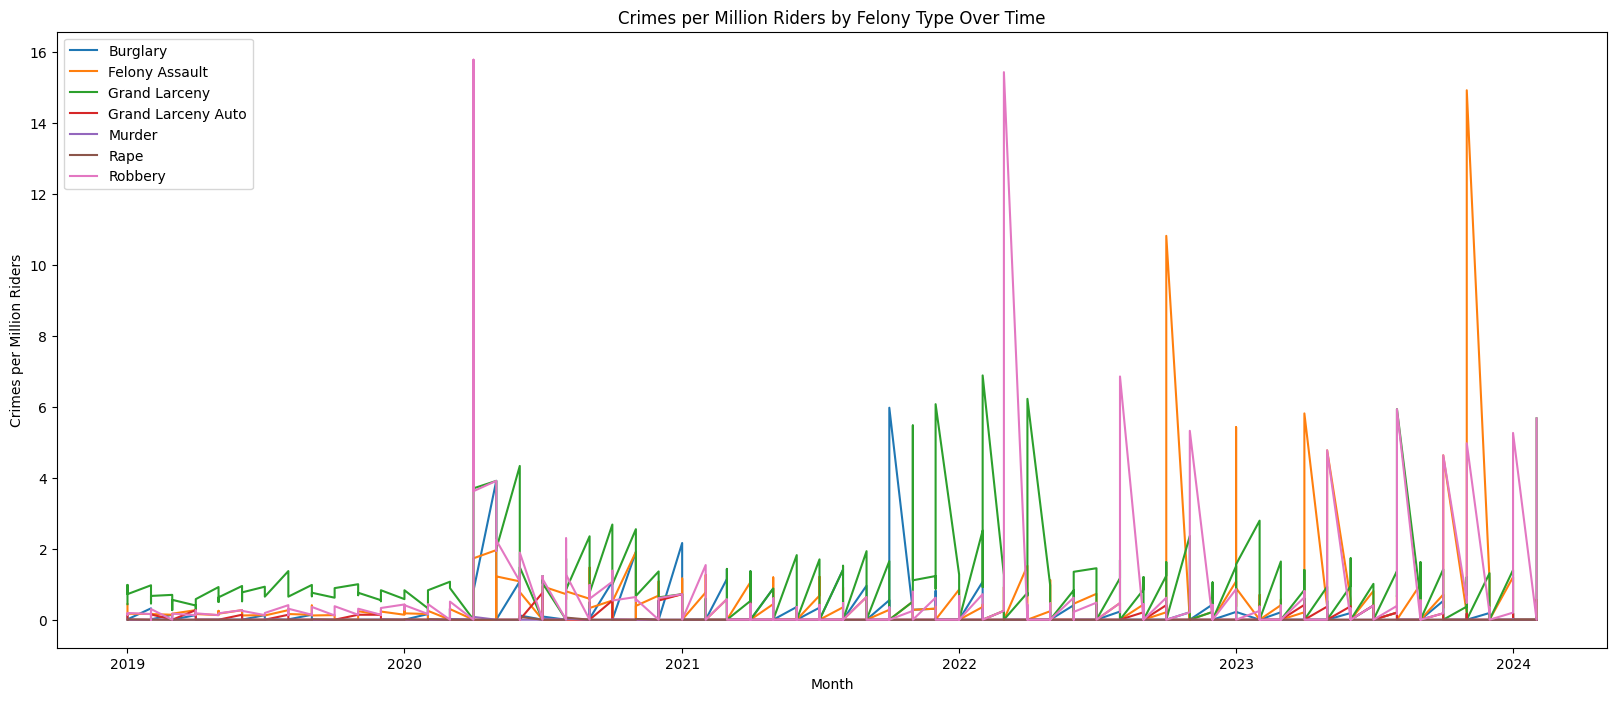

In [22]:
for felony_type, df in data.groupby('Felony Type'):
    plt.plot(df['Month'], df['Crimes per Million Riders'], label=felony_type)
plt.title('Crimes per Million Riders by Felony Type Over Time')
plt.xlabel('Month')
plt.ylabel('Crimes per Million Riders')
plt.legend()
plt.show()

From the above graph for Crimes per million riders by felony type over time we can observe that as the number of riders are increasing the number of felonies are also increasing after the Covid 19 period of 2020 - 2021.